In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import random

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
from nltk import download
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [5]:
import sys
sys.path.append('..')

from yelpsent import data
from yelpsent import features
from yelpsent import metrics
from yelpsent import visualization

# Load Dataset

In [6]:
data_train, data_test = data.load_dataset("../data/yelp_train.json",
                                          "../data/yelp_test.json")

In [7]:
data_train.head()

,review,sentiment
0,"The food was great and unique, we both loved i...",5
1,"So disappointing, don't know if it's the chang...",2
2,"Nice staff and good food, but seems like an un...",3
3,Average Joe's is definitely not average at all...,5
4,"Everything about this place is perfectly fine,...",2


In [8]:
data_train.describe()

,sentiment
count,271915.000000
mean,3.625935
std,1.263561
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [9]:
data_test.head()

,review,sentiment
0,Dropped by on a week night because I was reall...,4
1,"4 of us waited 30 mins for the coffee, got up ...",1
2,Twenty-two dollars for two people for a lunch ...,4
3,I love this place! Great location in the heart...,5
4,I walked an hour across town to get here becau...,5


In [10]:
data_test.describe()

,sentiment
count,90639.000000
mean,3.624091
std,1.263476
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [11]:
X_train = data_train['review'].tolist()
y_train = data_train['sentiment'].tolist()

In [12]:
X_test = data_test['review'].tolist()
y_test = data_test['sentiment'].tolist()

# Baseline

Naive Bayes with default parameters
- Unigram
- No stop words
- No tokenizer

In [13]:
baseline = Pipeline([
    ('vect', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [14]:
baseline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [15]:
y_train_pred_baseline = baseline.predict(X_train)

In [16]:
print(classification_report(y_train, y_train_pred_baseline))

              precision    recall  f1-score   support

           1       0.63      0.69      0.66     25559
           2       0.50      0.43      0.46     28269
           3       0.55      0.54      0.55     48787
           4       0.62      0.61      0.62     89012
           5       0.70      0.74      0.72     80288

    accuracy                           0.62    271915
   macro avg       0.60      0.60      0.60    271915
weighted avg       0.62      0.62      0.62    271915



In [17]:
y_test_pred_baseline = baseline.predict(X_test)

In [18]:
print(classification_report(y_test, y_test_pred_baseline))

              precision    recall  f1-score   support

           1       0.60      0.66      0.63      8611
           2       0.40      0.33      0.36      9251
           3       0.47      0.45      0.46     16367
           4       0.55      0.55      0.55     29780
           5       0.66      0.70      0.68     26630

    accuracy                           0.56     90639
   macro avg       0.54      0.54      0.54     90639
weighted avg       0.56      0.56      0.56     90639



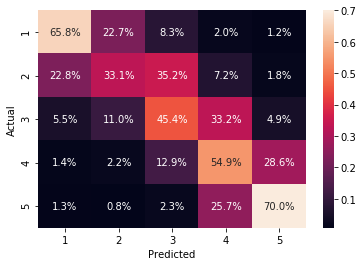

In [19]:
visualization.confusion_heat_map(y_test,
                                 y_test_pred_baseline,
                                 normalize='true',
                                 fmt='.1%',
                                 labels=set(y_test))

# 1 - N-Grams

Unigram + Bigrams

In [20]:
bigrams = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('nb', MultinomialNB())
])

In [21]:
bigrams.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [22]:
y_train_pred_bigrams = bigrams.predict(X_train)

In [23]:
print(classification_report(y_train, y_train_pred_bigrams))

              precision    recall  f1-score   support

           1       0.88      0.78      0.83     25559
           2       0.92      0.58      0.71     28269
           3       0.77      0.77      0.77     48787
           4       0.77      0.91      0.83     89012
           5       0.90      0.86      0.88     80288

    accuracy                           0.82    271915
   macro avg       0.85      0.78      0.80    271915
weighted avg       0.83      0.82      0.82    271915



In [24]:
y_test_pred_bigrams = bigrams.predict(X_test)

In [25]:
print(classification_report(y_test, y_test_pred_bigrams))

              precision    recall  f1-score   support

           1       0.72      0.57      0.64      8611
           2       0.42      0.11      0.18      9251
           3       0.41      0.33      0.37     16367
           4       0.50      0.79      0.61     29780
           5       0.74      0.58      0.65     26630

    accuracy                           0.56     90639
   macro avg       0.56      0.48      0.49     90639
weighted avg       0.57      0.56      0.54     90639



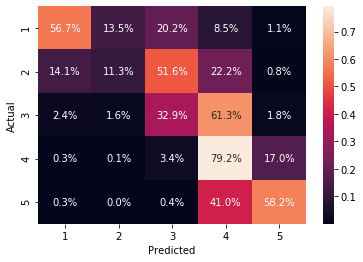

In [26]:
visualization.confusion_heat_map(y_test,
                                 y_test_pred_bigrams,
                                 normalize='true',
                                 fmt='.1%',
                                 labels=set(y_test))

Unigram + Bigrams + Trigrams

In [27]:
trigrams = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3))),
    ('nb', MultinomialNB())
])

In [28]:
trigrams.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [29]:
y_train_pred_trigrams = trigrams.predict(X_train)

In [30]:
print(classification_report(y_train, y_train_pred_trigrams))

              precision    recall  f1-score   support

           1       0.99      0.85      0.91     25559
           2       0.99      0.76      0.86     28269
           3       0.91      0.90      0.91     48787
           4       0.87      0.98      0.92     89012
           5       0.98      0.96      0.97     80288

    accuracy                           0.93    271915
   macro avg       0.95      0.89      0.91    271915
weighted avg       0.93      0.93      0.93    271915



In [31]:
y_test_pred_trigrams = trigrams.predict(X_test)

In [32]:
print(classification_report(y_test, y_test_pred_trigrams))

              precision    recall  f1-score   support

           1       0.83      0.39      0.53      8611
           2       0.40      0.03      0.05      9251
           3       0.30      0.12      0.18     16367
           4       0.41      0.90      0.57     29780
           5       0.80      0.43      0.56     26630

    accuracy                           0.48     90639
   macro avg       0.55      0.37      0.38     90639
weighted avg       0.54      0.48      0.44     90639



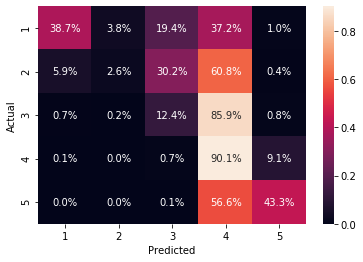

In [33]:
visualization.confusion_heat_map(y_test,
                                 y_test_pred_trigrams,
                                 normalize='true',
                                 fmt='.1%',
                                 labels=set(y_test))

# 2 - Remove Non-Words/Numbers

In [34]:
regexp = Pipeline([
    ('vect', CountVectorizer(tokenizer=RegexpTokenizer(pattern=r'[a-zA-Z0-9]+').tokenize)),
    ('nb', MultinomialNB())
])

In [35]:
regexp.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-Z0-9]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>,
                                 vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [36]:
y_train_pred_regexp = regexp.predict(X_train)

In [37]:
print(classification_report(y_train, y_train_pred_regexp))

              precision    recall  f1-score   support

           1       0.63      0.70      0.66     25559
           2       0.50      0.43      0.46     28269
           3       0.55      0.54      0.55     48787
           4       0.62      0.60      0.61     89012
           5       0.70      0.74      0.72     80288

    accuracy                           0.62    271915
   macro avg       0.60      0.60      0.60    271915
weighted avg       0.62      0.62      0.62    271915



In [38]:
y_test_pred_regexp = regexp.predict(X_test)

In [39]:
print(classification_report(y_test, y_test_pred_regexp))

              precision    recall  f1-score   support

           1       0.60      0.66      0.63      8611
           2       0.40      0.34      0.37      9251
           3       0.47      0.46      0.46     16367
           4       0.56      0.54      0.55     29780
           5       0.66      0.70      0.68     26630

    accuracy                           0.56     90639
   macro avg       0.54      0.54      0.54     90639
weighted avg       0.56      0.56      0.56     90639



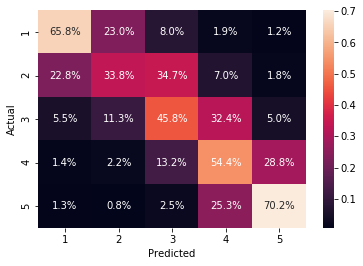

In [40]:
visualization.confusion_heat_map(y_test,
                                 y_test_pred_regexp,
                                 normalize='true',
                                 fmt='.1%',
                                 labels=set(y_test))

# 3 - Remove Stopwords

In [41]:
stopwords = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords.words('english'))),
    ('nb', MultinomialNB())
])

In [42]:
stopwords.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
   

In [43]:
y_train_pred_stopwords = stopwords.predict(X_train)

In [44]:
print(classification_report(y_train, y_train_pred_stopwords))

              precision    recall  f1-score   support

           1       0.64      0.71      0.67     25559
           2       0.53      0.44      0.48     28269
           3       0.56      0.54      0.55     48787
           4       0.62      0.62      0.62     89012
           5       0.70      0.73      0.72     80288

    accuracy                           0.63    271915
   macro avg       0.61      0.61      0.61    271915
weighted avg       0.63      0.63      0.63    271915



In [45]:
y_test_pred_stopwords = stopwords.predict(X_test)

In [46]:
print(classification_report(y_test, y_test_pred_stopwords))

              precision    recall  f1-score   support

           1       0.61      0.67      0.64      8611
           2       0.41      0.33      0.36      9251
           3       0.47      0.44      0.45     16367
           4       0.55      0.56      0.55     29780
           5       0.66      0.69      0.67     26630

    accuracy                           0.56     90639
   macro avg       0.54      0.54      0.54     90639
weighted avg       0.56      0.56      0.56     90639



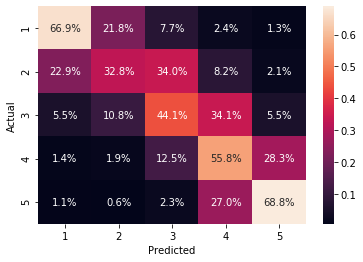

In [47]:
visualization.confusion_heat_map(y_test,
                                 y_test_pred_stopwords,
                                 normalize='true',
                                 fmt='.1%',
                                 labels=set(y_test))

# 4 - Stemming

In [53]:
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

In [54]:
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

In [55]:
stemming = Pipeline([
    ('vect', CountVectorizer(analyzer=stemmed_words)),
    ('nb', MultinomialNB())
])

In [56]:
stemming.fit(X_train, y_train)

KeyboardInterrupt: 

In [43]:
y_train_pred_stemming = stemming.predict(X_train)

In [44]:
print(classification_report(y_train, y_train_pred_stemming))

              precision    recall  f1-score   support

           1       0.64      0.71      0.67     25559
           2       0.53      0.44      0.48     28269
           3       0.56      0.54      0.55     48787
           4       0.62      0.62      0.62     89012
           5       0.70      0.73      0.72     80288

    accuracy                           0.63    271915
   macro avg       0.61      0.61      0.61    271915
weighted avg       0.63      0.63      0.63    271915



In [45]:
y_test_pred_stemming = stemming.predict(X_test)

In [46]:
print(classification_report(y_test, y_test_pred_stemming))

              precision    recall  f1-score   support

           1       0.61      0.67      0.64      8611
           2       0.41      0.33      0.36      9251
           3       0.47      0.44      0.45     16367
           4       0.55      0.56      0.55     29780
           5       0.66      0.69      0.67     26630

    accuracy                           0.56     90639
   macro avg       0.54      0.54      0.54     90639
weighted avg       0.56      0.56      0.56     90639



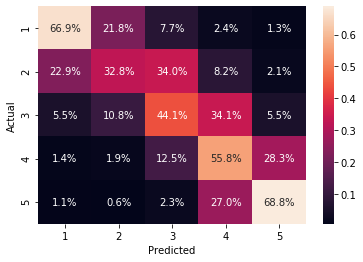

In [47]:
visualization.confusion_heat_map(y_test,
                                 y_test_pred_stemming,
                                 normalize='true',
                                 fmt='.1%',
                                 labels=set(y_test))